# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

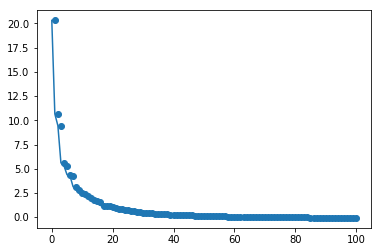

In [2]:
# Samples corresponding to the last digit of your roll number (plot a)
indices = []
length = len(train_labels)
for i in range(length):
    if(train_labels[i] == 9):
        indices.append(i)
# for i in indices:
#     print (i)
data = []
for i in indices:
    data.append(train_data[i])
# print(len(data))

cova = np.cov(np.transpose(data))#because we want 600,784)
# print (cova.shape)

eigval,eigvec = np.linalg.eig(cova)
eigval=eigval.real
# print(eigvec.shape)
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

# print(eigval);
np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
plt.scatter(xaxis,eigval[:100])
plt.plot(eigval[:100])

# print(eigval.shape)



        
        


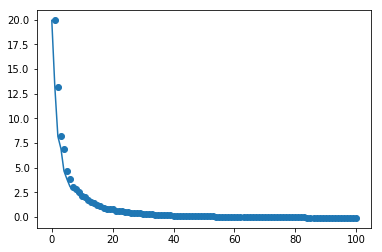

In [3]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
# Samples corresponding to the last digit of your roll number (plot a)
indices = []
length = len(train_labels)
for i in range(length):
    if(train_labels[i] == 0):
        indices.append(i)
        
data = []
for i in indices:
    data.append(train_data[i])

cova = np.cov(np.transpose(data))# because we want (600,784)

eigval,eigvec = np.linalg.eig(cova)
eigval=eigval.real
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
plt.scatter(xaxis,eigval[:100])
plt.plot(eigval[:100])

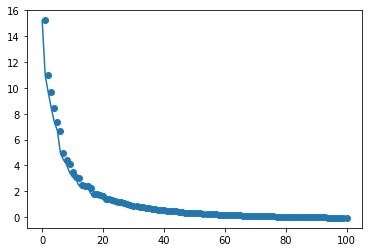

In [4]:
# All training data (plot c)

cova = np.cov(np.transpose(train_data))# because we want (600,784)

eigval,eigvec = np.linalg.eig(cova)
eigval=eigval.real
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
plt.scatter(xaxis,eigval[:100])
plt.plot(eigval[:100])

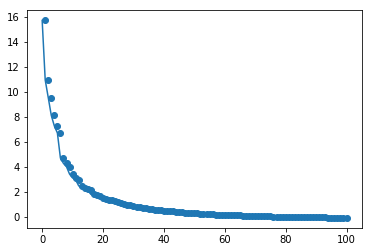

In [5]:
# Randomly selected 50% of the training data (plot d)
import random

indices = []
ctr = 0
while (ctr<3000):
    temp = random.randint(0, 5999)
    if(temp not in indices):
        indices.append(temp)
        ctr = ctr+1
        
data = []
for i in indices:
    data.append(train_data[i])

cova = np.cov(np.transpose(data))# because we want (600,784)

eigval,eigvec = np.linalg.eig(cova)
eigval = eigval.real
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
plt.scatter(xaxis,eigval[:100])
plt.plot(eigval[:100])

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
### Plots a and b

### Plots b and c

### Approximate Ranks

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

### Answers

- Possible Images:
- Accessible
- If

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit)

---

In [ ]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here
n = 784
H = np.random.rand(n, n)
u, s, v = np.linalg.svd(H, full_matrices=False)
print(u.shape)
new = np.matmul(u, train_data.T)
print(new.shape)

cova = np.cov(np.transpose(new))# because we want (600,784)

eigval,eigvec = np.linalg.eig(cova)
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
# plt.scatter(xaxis,eigval[:100])
# plt.plot(eigval[:100])

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

In [4]:
# Plotting code here
print(train_data.shape)
cova = np.cov(np.transpose(train_data))
eigval, eigvec =np.linalg.eig(cova)
print(eigvec.shape)

(6000, 784)
(784, 784)


## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [5]:
# Print accuracy on the test set using MLE
cova = np.cov(np.transpose(train_data))# because we want (600,784)
eigval,eigvec = np.linalg.eig(cova)
print(eigvec.shape)

newcova = eigvec[:, :30] #784x25
print(newcova.shape)

newtest = test_data.dot(newcova)#1000x25
newtrain = train_data.dot(newcova)#6000x25
print(newtrain.shape)

finaldata = []
length = len(train_labels)
for j in range(10):
    indices = []
    data = []
    for i in range(length):
        if(train_labels[i] == j):
            indices.append(i)
    for i in indices:
        data.append(newtrain[i])
    finaldata.append(data)
print(np.asarray(finaldata).shape)#10x600x25

allmeans = []
allinverse = []
allconsts = []

for i in finaldata:
    i = np.array(i)#600x25
    cova = np.cov(np.transpose(i))#25x25
    inverse = np.linalg.inv(cova)#25x25
    deter = np.linalg.det(cova)
    means = np.mean(i, axis = 0)#25x1
    const_term = np.divide(1, np.power(2*np.pi,(0.5*30)) * np.power(deter, 0.5))
    allinverse.append(inverse)
    allmeans.append(means)
    allconsts.append(const_term)
    
acc = 0
length = len(newtest)
for i in range(length):#going through every test data
    cur_testdata = newtest[i]
    results = []
    length2 = len(finaldata)
    for j in range(length2):
        x_minus_mu = cur_testdata - allmeans[j]
        exp_term = -0.5 * np.linalg.multi_dot([x_minus_mu.T, allinverse[j], x_minus_mu])
        final_term = np.exp(exp_term) * allconsts[j]
        results.append(final_term)
    
    MLE_answer = np.argmax(results)
    if(MLE_answer)==test_labels[i]:
        acc += 1
        
print(acc/10)



(784, 784)
(784, 30)
(6000, 30)
(10, 600, 30)
94.8


In [6]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)


In [18]:
# Print accuracy using Bayesian pairwise majority voting method

cova = np.cov(np.transpose(train_data))# because we want (600,784)
eigval,eigvec = np.linalg.eig(cova)
print(eigvec.shape)

newcova = eigvec[:, :30] #784x25
print(newcova.shape)

newtest = test_data.dot(newcova)#1000x25
newtrain = train_data.dot(newcova)#6000x25
print(newtrain.shape)

finaldata = []
length = len(train_labels)
for j in range(10):
    indices = []
    data = []
    for i in range(length):
        if(train_labels[i] == j):
            indices.append(i)
    for i in indices:
        data.append(newtrain[i])
    finaldata.append(data)
print(np.asarray(finaldata).shape)#10x600x25

allmeans = []
allinverse = []

for i in finaldata:
    i = np.array(i)#600x25
    means = np.mean(i, axis = 0)#25x1
    allmeans.append(means)
    for j in finaldata:
        j = np.array(j)#converting to numpy array
        cova1 = np.cov(np.transpose(i))
        cova2 = np.cov(np.transpose(j))
        cova = (cova1+cova2)/2
        inverse = np.linalg.inv(cova)
        allinverse.append(inverse)
    
acc = 0
length = len(newtest)
for i in range(length):#going through every test data
    cur_testdata = newtest[i]
    results = np.zeros(10)
    
    length2 = len(finaldata)
    for j in range(length2):
        x_minus_mu1 = cur_testdata - allmeans[j]
        for k in range(length2):
            if(j == k):
                continue;
            x_minus_mu2 = cur_testdata - allmeans[k]
            exp_term1 = np.linalg.multi_dot([x_minus_mu1.T, allinverse[10*j + k], x_minus_mu1])
            exp_term2 = np.linalg.multi_dot([x_minus_mu2.T, allinverse[10*j + k], x_minus_mu2])
            
            if exp_term1 < exp_term2:
                results[j]+=1
            else:
                results[k]+=1
    PM_answer = np.argmax(results)
    if(PM_answer)==test_labels[i]:
        acc += 1
        
print(acc/10)

(784, 784)
(784, 30)
(6000, 30)
(10, 600, 30)
88.4


In [17]:
# Print accuracy using Simple Perpendicular Bisector majority voting method

cova = np.cov(np.transpose(train_data))# because we want (600,784)
eigval,eigvec = np.linalg.eig(cova)
print(eigvec.shape)

newcova = eigvec[:, :30] #784x25
print(newcova.shape)

newtest = test_data.dot(newcova)#1000x25
newtrain = train_data.dot(newcova)#6000x25
print(newtrain.shape)

finaldata = []
length = len(train_labels)
for j in range(10):
    indices = []
    data = []
    for i in range(length):
        if(train_labels[i] == j):
            indices.append(i)
    for i in indices:
        data.append(newtrain[i])
    finaldata.append(data)
    
print(np.asarray(finaldata).shape)#10x600x25

allmeans = []

for i in finaldata:
    i = np.array(i)#600x25
    means = np.mean(i, axis = 0)#25x1
    allmeans.append(means)

print(newtest[1].shape)
acc = 0
length = len(newtest)
for i in range(length):#going through every test data
    cur_testdata = newtest[i]  
    results = []
    length2 = len(finaldata)
    for j in range(length2):
        final_term = np.linalg.norm(cur_testdata - allmeans[j])
        results.append(final_term)
    
    PB_answer = np.argmin(results)
    if(PB_answer)==test_labels[i]:
        acc += 1
        
print(acc/10)

(784, 784)
(784, 30)
(6000, 30)
(10, 600, 30)
(30,)
75.3


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [25]:
# Your code here
# Print accuracies with K = 1, 3, 7
arr = [1,3,7]

x1 = np.square(train_data)
y1 = x1.sum(axis=1)

x2 = np.square(test_data)
y2 = x2.sum(axis=1)

total = y1 + y2[:,np.newaxis]#1000x6000
diff = 2 * np.dot(train_data, test_data.T)#6000x1000
mat = total - diff.T

for i in arr:
    
    
    

(1000, 6000)


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [13]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [14]:
# Your code here

---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---